In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [83]:
def add_worm_temperature_zones():
    """Add worm comfort and danger temperature zones as horizontal lines to a plot."""
    plt.axhline(35, linestyle='--', color='red', label='Worm Danger Max (35°C)')
    plt.axhline(30, linestyle='--', color='green', label='Worm Comfort Max (30 °C)')
    plt.axhline(15, linestyle='--', color='green', label='Worm Comfort Min (15 °C)')
    plt.axhline(5, linestyle='--', color='orange', label='Worm Slow Down Min (5 °C)')
    plt.axhline(0, linestyle='--', color='red', label='Worm Danger Min (0 °C)')

## Coldest days

Find the coldest days in past 10 years

In [84]:
# Load both datasets
winter_10y_temp = xr.open_dataset("emwcf/jan-feb-2015-2024/instant.nc")  # temperatures

# Convert to DataFrame
winter_10y = winter_10y_temp.to_dataframe().reset_index()

# Convert Kelvin to Celsius
winter_10y['temp'] = winter_10y['t2m'] - 273.15
winter_10y['soil_0_7'] = winter_10y['stl1'] - 273.15

In [85]:
winter_10y = winter_10y.rename(columns={"valid_time": "time"})
winter_10y['month'] = pd.to_datetime(winter_10y['time']).dt.month
winter_10y = winter_10y.set_index('time')

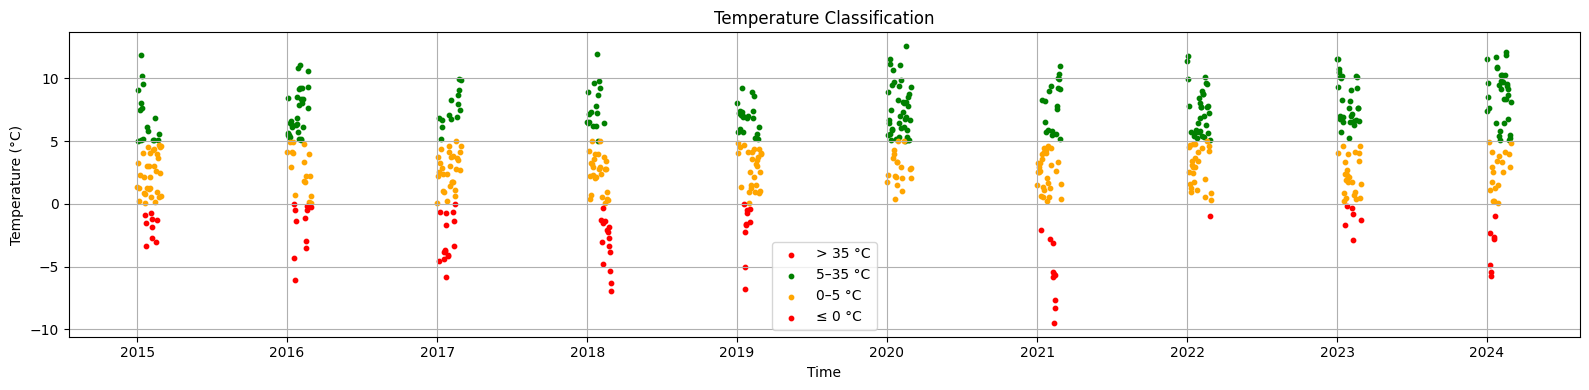

In [86]:
import matplotlib.pyplot as plt

# Define masks for each range
mask_red_hot = winter_10y['temp'] > 35
mask_green = (winter_10y['temp'] > 5) & (winter_10y['temp'] <= 35)
mask_orange = (winter_10y['temp'] > 0) & (winter_10y['temp'] <= 5)
mask_red_cold = winter_10y['temp'] <= 0

plt.figure(figsize=(16, 4))

# Plot each range with corresponding color
plt.scatter(winter_10y.index[mask_red_hot], winter_10y['temp'][mask_red_hot], color='red', label='> 35 °C', s=10)
plt.scatter(winter_10y.index[mask_green], winter_10y['temp'][mask_green], color='green', label='5–35 °C', s=10)
plt.scatter(winter_10y.index[mask_orange], winter_10y['temp'][mask_orange], color='orange', label='0–5 °C', s=10)
plt.scatter(winter_10y.index[mask_red_cold], winter_10y['temp'][mask_red_cold], color='red', label='≤ 0 °C', s=10)

plt.title("Temperature Classification")
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [87]:
# Ensure the index is datetime (if not already)
winter_10y.index = pd.to_datetime(winter_10y.index)

# Step 1: Group by date and get daily minimum temperature
daily_min_temps = winter_10y['temp'].groupby(winter_10y.index.date).min()

# Step 2: Sort by temperature and select the 20 coldest days
coldest_20_days = daily_min_temps.sort_values().head(10)

# Display the result
print(coldest_20_days)

2021-02-11   -9.495209
2021-02-13   -8.333099
2021-02-12   -7.696869
2018-02-28   -6.925385
2019-01-21   -6.797455
2018-02-27   -6.293060
2016-01-19   -6.059174
2017-01-22   -5.843353
2021-02-09   -5.806732
2024-01-11   -5.763519
Name: temp, dtype: float32


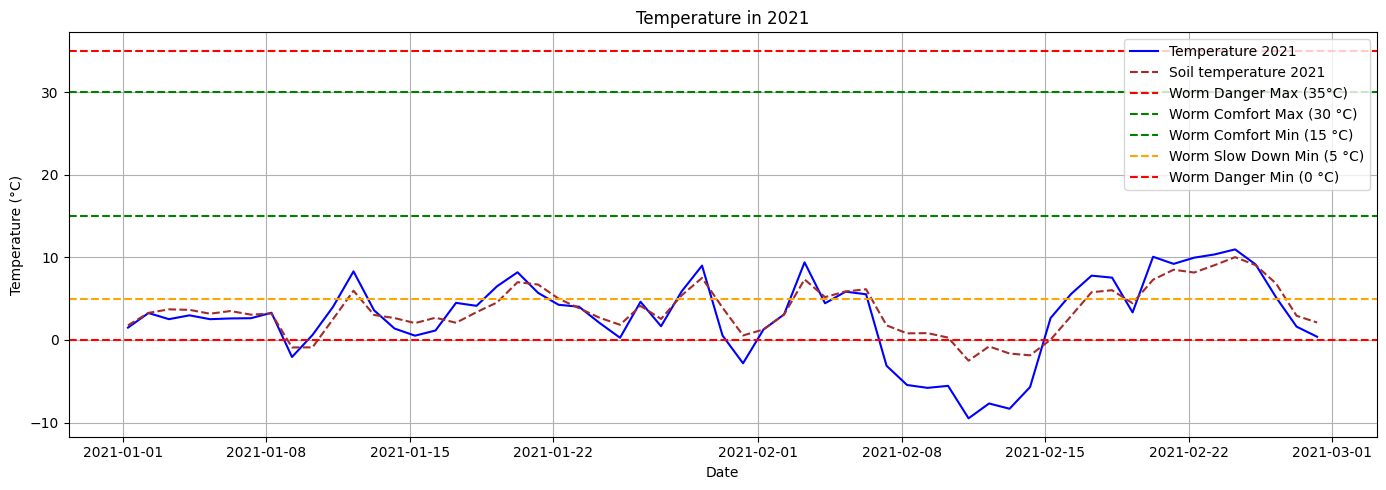

In [88]:
# Filter data for 2021
winter_10y_2021 = winter_10y.loc['2021']

# Plot
plt.figure(figsize=(14, 5))
plt.plot(winter_10y_2021.index, winter_10y_2021['temp'], color='blue', label='Temperature 2021')
plt.plot(winter_10y_2021.index, winter_10y_2021['soil_0_7'], color='brown', label='Soil temperature 2021', linestyle="--")

add_worm_temperature_zones()

plt.title("Temperature in 2021")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Plot the coldest months

In [89]:
import xarray as xr

# Load dataset
cold_winters_temp = xr.open_dataset("emwcf/jan-feb-2016-2018-2019-2021/instant.nc")  # temperatures
cold_winters_rad = xr.open_dataset("emwcf/jan-feb-2016-2018-2019-2021/accum.nc")  # radiation

cold_winters_combined = xr.merge([cold_winters_temp, cold_winters_rad])

# Convert to DataFrame
cold_winters = cold_winters_combined.to_dataframe().reset_index()

# Convert Kelvin to Celsius
cold_winters['temp'] = cold_winters['t2m'] - 273.15
cold_winters['soil_0_7'] = cold_winters['stl1'] - 273.15

# Convert J/m² to W/m²
cold_winters['sun'] = cold_winters['ssrd'] / 3600

In [90]:
cold_winters = cold_winters.rename(columns={"valid_time": "time"})
cold_winters['month'] = pd.to_datetime(cold_winters['time']).dt.month
cold_winters = cold_winters.set_index('time')

In [91]:
import matplotlib.pyplot as plt

# Ensure index is datetime
cold_winters.index = pd.to_datetime(cold_winters.index)

# Filter for February 2021
coldest_winter = cold_winters.loc['2021-02']
feb_2021 = cold_winters.loc['2021-02']
jan_2019 = cold_winters.loc['2019-01']
feb_2018 = cold_winters.loc['2018-02']
jan_2016 = cold_winters.loc['2016-01']

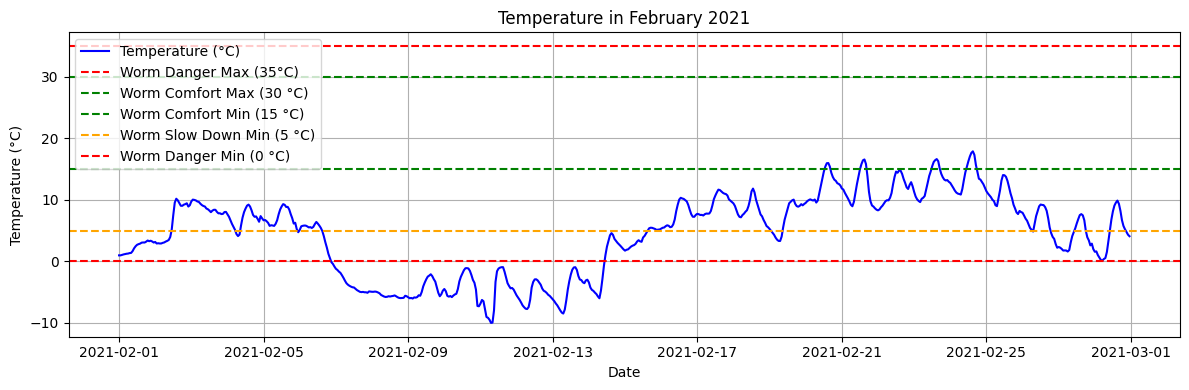

In [92]:
plt.figure(figsize=(12, 4))
plt.plot(feb_2021.index, feb_2021['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in February 2021")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

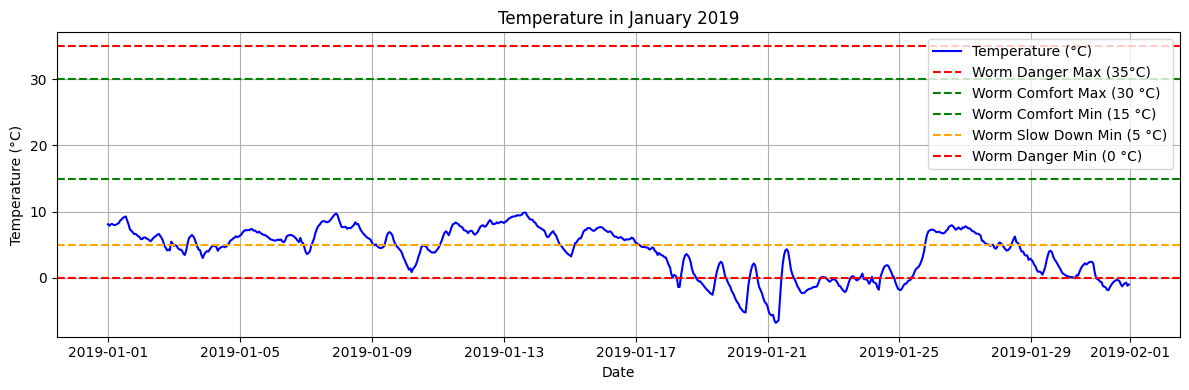

In [93]:
plt.figure(figsize=(12, 4))
plt.plot(jan_2019.index, jan_2019['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in January 2019")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

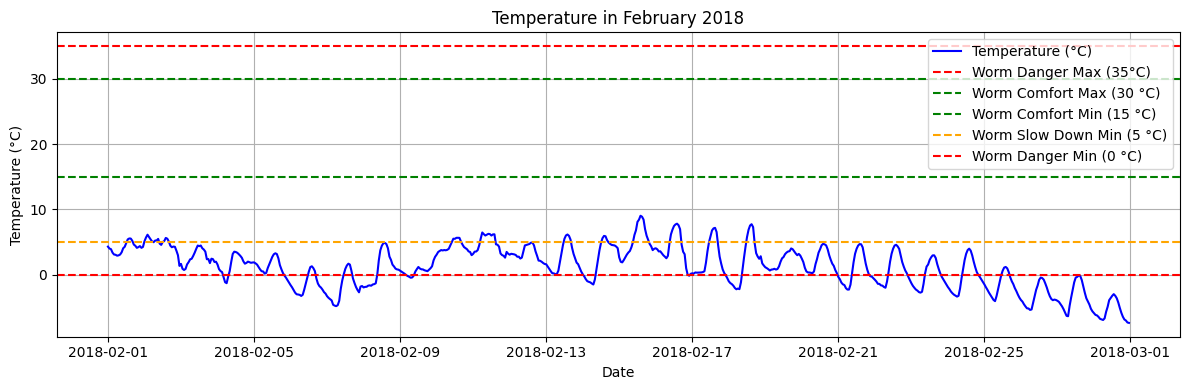

In [94]:
plt.figure(figsize=(12, 4))
plt.plot(feb_2018.index, feb_2018['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in February 2018")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

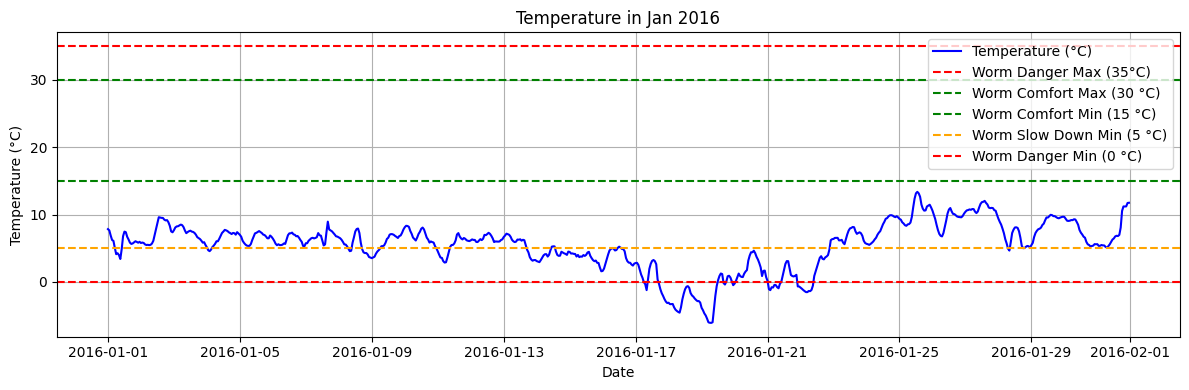

In [95]:
plt.figure(figsize=(12, 4))
plt.plot(jan_2016.index, jan_2016['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in Jan 2016")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Hottest days

Find the hottest days in the past 10 years

In [96]:
import xarray as xr

# Load both datasets
summer_10y_temp = xr.open_dataset("emwcf/jul-aug-2015-2024/instant.nc")  # temperatures

# Convert to DataFrame
summer_10y = summer_10y_temp.to_dataframe().reset_index()

# Convert Kelvin to Celsius
summer_10y['temp'] = summer_10y['t2m'] - 273.15
summer_10y['soil_0_7'] = summer_10y['stl1'] - 273.15

In [97]:
summer_10y = summer_10y.rename(columns={"valid_time": "time"})
summer_10y['month'] = pd.to_datetime(summer_10y['time']).dt.month
summer_10y = summer_10y.set_index('time')

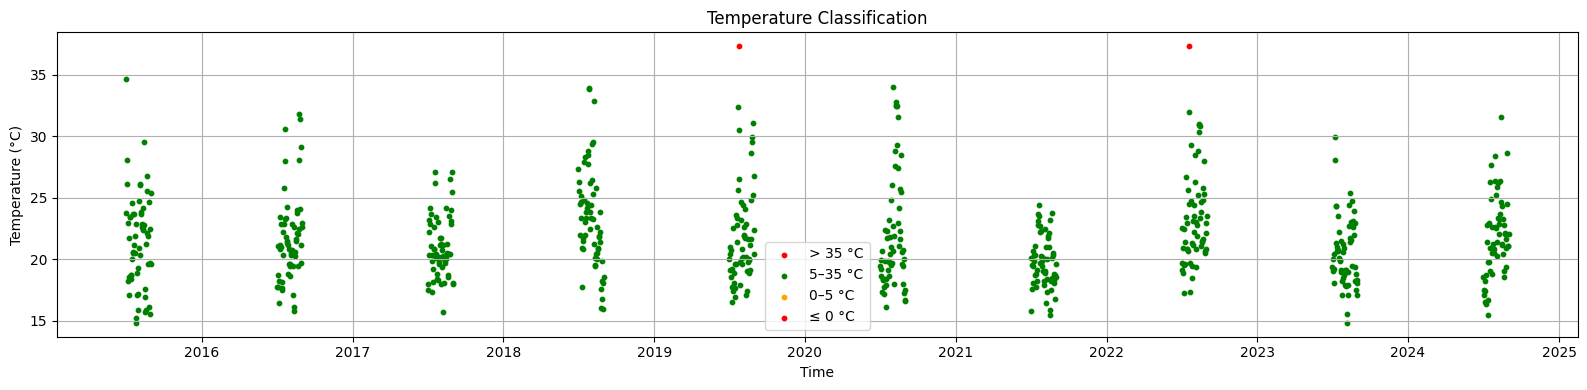

In [98]:
import matplotlib.pyplot as plt

# Define masks for each range
mask_red_hot = summer_10y['temp'] > 35
mask_green = (summer_10y['temp'] > 5) & (summer_10y['temp'] <= 35)
mask_orange = (summer_10y['temp'] > 0) & (summer_10y['temp'] <= 5)
mask_red_cold = summer_10y['temp'] <= 0

plt.figure(figsize=(16, 4))

# Plot each range with corresponding color
plt.scatter(summer_10y.index[mask_red_hot], summer_10y['temp'][mask_red_hot], color='red', label='> 35 °C', s=10)
plt.scatter(summer_10y.index[mask_green], summer_10y['temp'][mask_green], color='green', label='5–35 °C', s=10)
plt.scatter(summer_10y.index[mask_orange], summer_10y['temp'][mask_orange], color='orange', label='0–5 °C', s=10)
plt.scatter(summer_10y.index[mask_red_cold], summer_10y['temp'][mask_red_cold], color='red', label='≤ 0 °C', s=10)

plt.title("Temperature Classification")
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [99]:
# Ensure the index is datetime
summer_10y.index = pd.to_datetime(summer_10y.index)

# Step 1: Group by date and get daily maximum temperature
daily_max_temps = summer_10y['temp'].groupby(summer_10y.index.date).max()

# Step 2: Sort by temperature (descending) and select the 20 hottest days
hottest_20_days = daily_max_temps.sort_values(ascending=False).head(10)

# Display the result
print(hottest_20_days)

2019-07-25    37.318024
2022-07-19    37.295074
2015-07-01    34.626373
2020-07-31    33.978424
2018-07-26    33.940338
2018-07-27    33.820221
2018-08-07    32.880035
2020-08-09    32.775787
2020-08-08    32.537262
2020-08-10    32.468658
Name: temp, dtype: float32


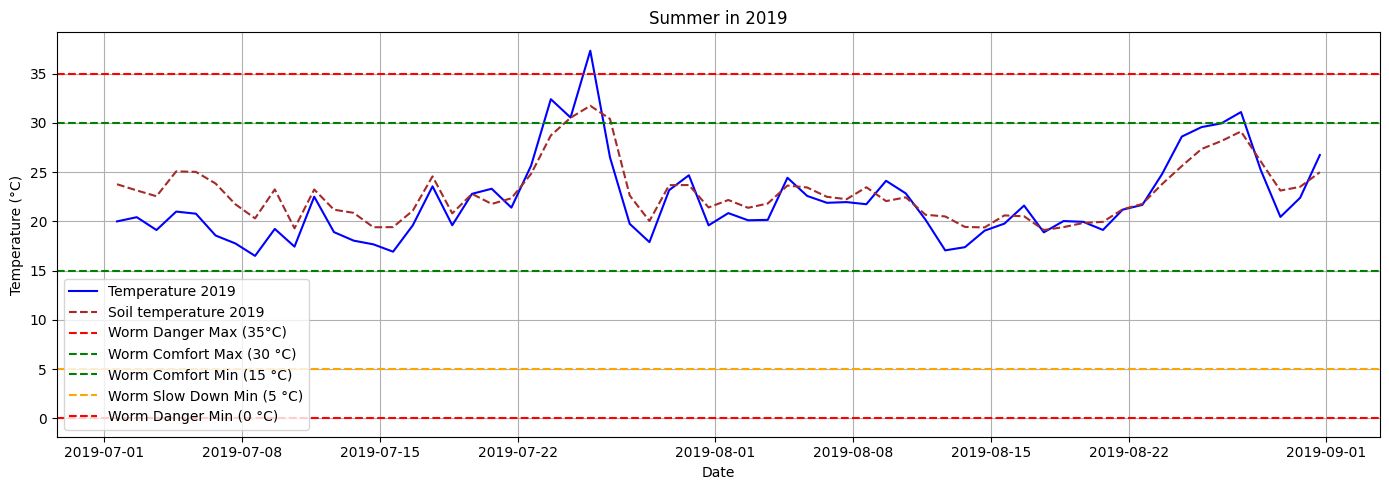

In [100]:
# Filter data for 2019
summer_10y_2019 = summer_10y.loc['2019']

# Plot
plt.figure(figsize=(14, 5))
plt.plot(summer_10y_2019.index, summer_10y_2019['temp'], color='blue', label='Temperature 2019')
plt.plot(summer_10y_2019.index, summer_10y_2019['soil_0_7'], color='brown', label='Soil temperature 2019', linestyle="--")

add_worm_temperature_zones()

plt.title("Summer in 2019")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Plot the hottest months

In [101]:
import xarray as xr

# Load dataset
hot_summers_temp = xr.open_dataset("emwcf/jul-2015-2018-2019-2020-2022/instant.nc")  # temperatures
hot_summers_rad = xr.open_dataset("emwcf/jul-2015-2018-2019-2020-2022/accum.nc")  # radiation

hot_summers_combined = xr.merge([hot_summers_temp, hot_summers_rad])

# Convert to DataFrame
hot_summers = hot_summers_combined.to_dataframe().reset_index()

# Convert Kelvin to Celsius
hot_summers['temp'] = hot_summers['t2m'] - 273.15
hot_summers['soil_0_7'] = hot_summers['stl1'] - 273.15
hot_summers['sun'] = hot_summers['ssrd'] / 3600

In [102]:
hot_summers = hot_summers.rename(columns={"valid_time": "time"})
hot_summers['month'] = pd.to_datetime(hot_summers['time']).dt.month
hot_summers = hot_summers.set_index('time')

In [103]:
# Ensure index is datetime
hot_summers.index = pd.to_datetime(hot_summers.index)

# Filter for February 2021
hottest_summer = hot_summers.loc['2019-07']
jul_2019 = hot_summers.loc['2019-07']
jul_2022 = hot_summers.loc['2022-07']
jul_2015 = hot_summers.loc['2015-07']
jul_2020 = hot_summers.loc['2020-07']
jul_2018 = hot_summers.loc['2018-07']

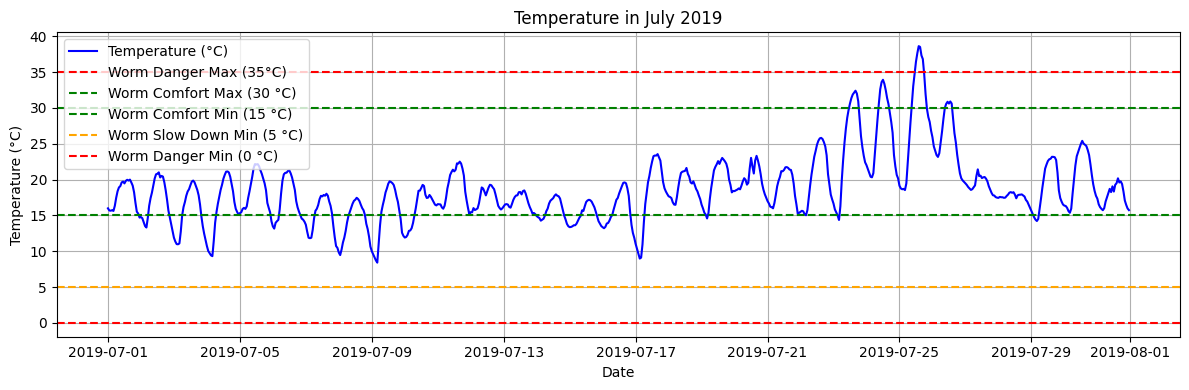

In [104]:
plt.figure(figsize=(12, 4))
plt.plot(jul_2019.index, jul_2019['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in July 2019")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

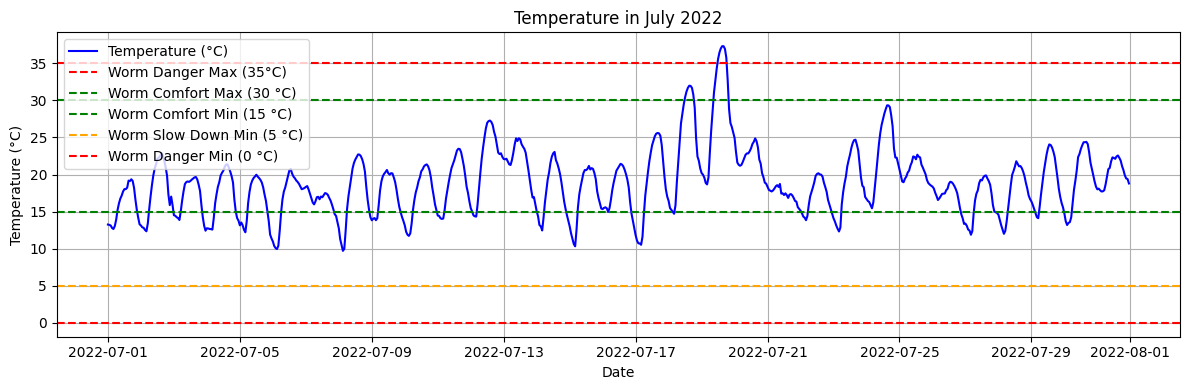

In [105]:
plt.figure(figsize=(12, 4))
plt.plot(jul_2022.index, jul_2022['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in July 2022")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

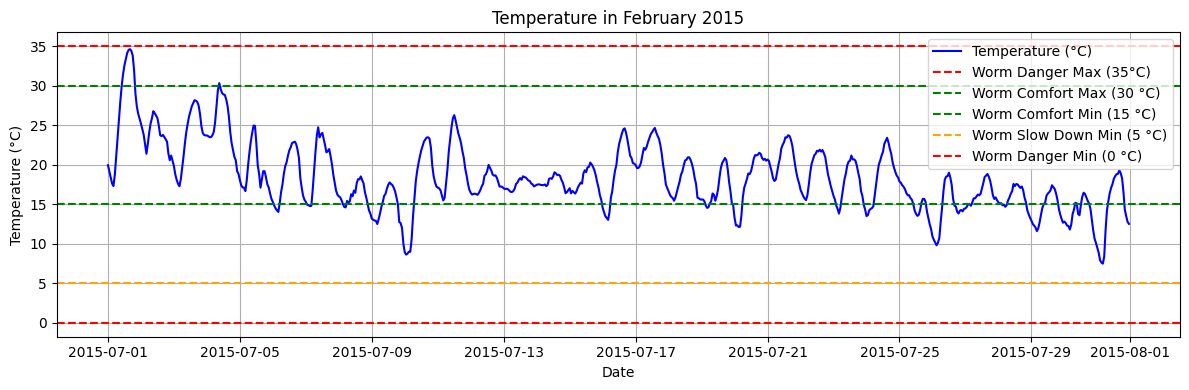

In [106]:
plt.figure(figsize=(12, 4))
plt.plot(jul_2015.index, jul_2015['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in February 2015")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

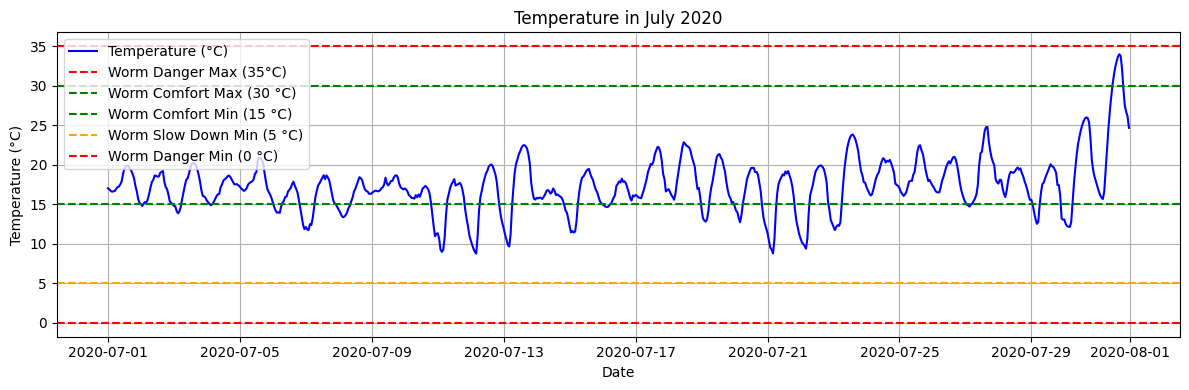

In [107]:
plt.figure(figsize=(12, 4))
plt.plot(jul_2020.index, jul_2020['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in July 2020")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

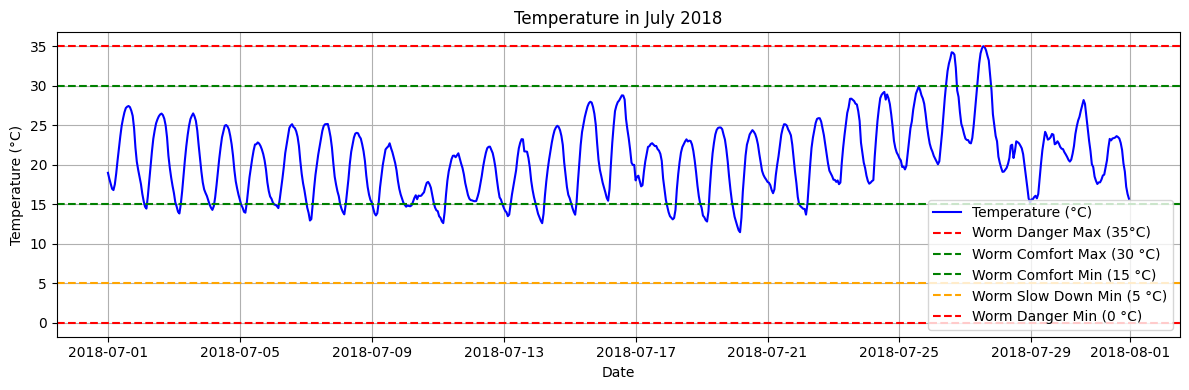

In [108]:
plt.figure(figsize=(12, 4))
plt.plot(jul_2018.index, jul_2018['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in July 2018")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Solar Radiation

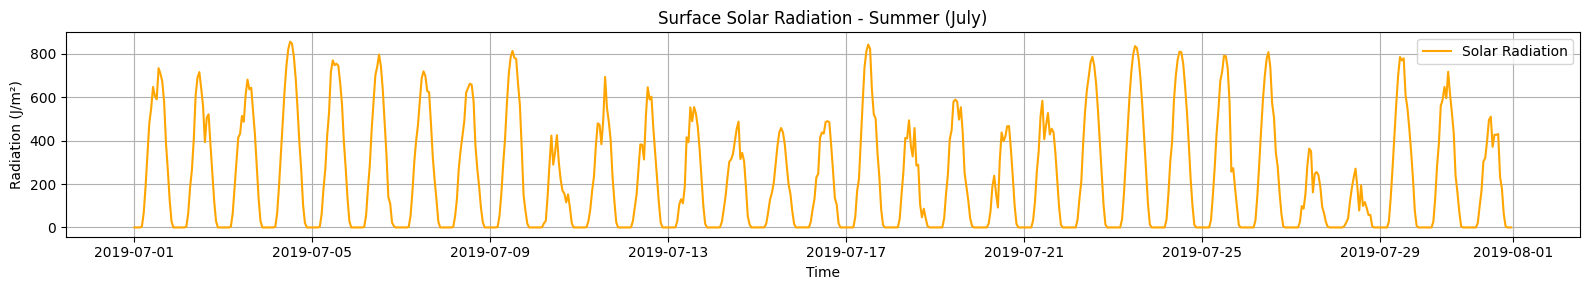

In [109]:
plt.figure(figsize=(16, 3))
plt.plot(hottest_summer.index, hottest_summer['sun'], color='orange', label='Solar Radiation')

plt.title("Surface Solar Radiation - Summer (July)")
plt.ylabel("Radiation (J/m²)")
plt.xlabel("Time")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

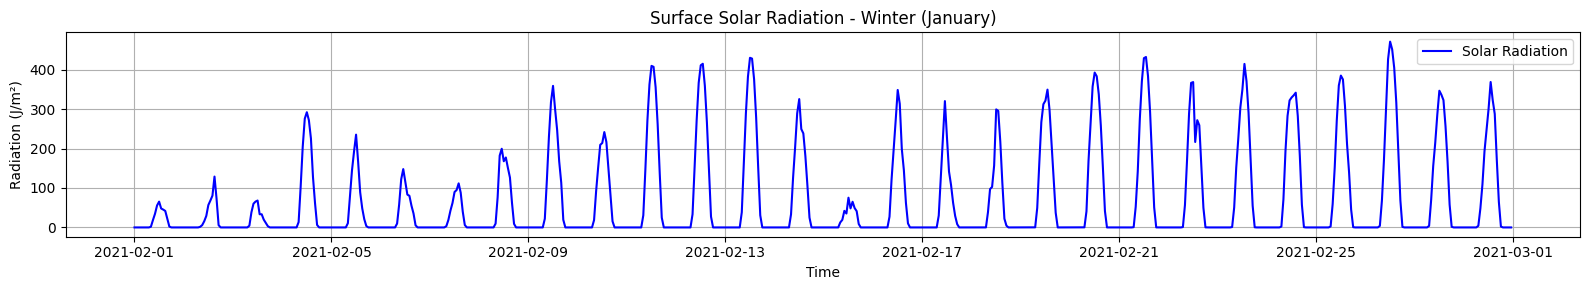

In [110]:
plt.figure(figsize=(16, 3))
plt.plot(coldest_winter.index, coldest_winter['sun'], color='blue', label='Solar Radiation')

plt.title("Surface Solar Radiation - Winter (January)")
plt.ylabel("Radiation (J/m²)")
plt.xlabel("Time")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

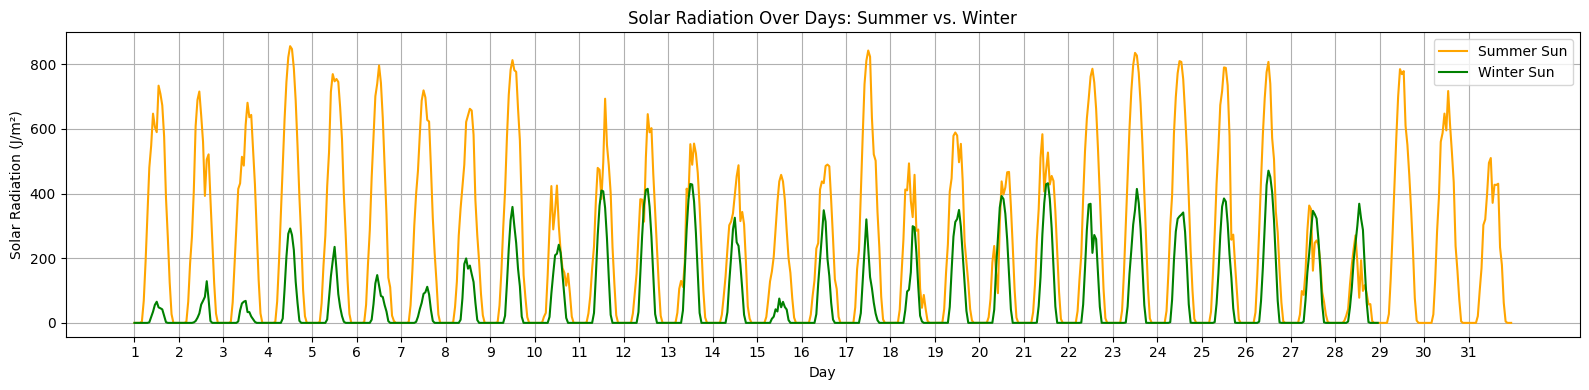

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate day numbers with fraction of day for x-axis positions
day_summer = (hottest_summer.index - hottest_summer.index[0]).days + hottest_summer.index.hour / 24 + 1
day_winter = (coldest_winter.index - coldest_winter.index[0]).days + coldest_winter.index.hour / 24 + 1

plt.figure(figsize=(16, 4))

plt.plot(day_summer, hottest_summer['sun'], label='Summer Sun', color='orange')
plt.plot(day_winter, coldest_winter['sun'], label='Winter Sun', color='green')

plt.title("Solar Radiation Over Days: Summer vs. Winter")
plt.xlabel("Day")
plt.ylabel("Solar Radiation (J/m²)")

# Get unique whole days from summer data to set ticks
unique_days = np.unique(day_summer.astype(int))
plt.xticks(unique_days)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Different soil levels

In [112]:
import xarray as xr

# Load both datasets
jan_july_2025_temp = xr.open_dataset("emwcf/jan-july-2025/instant.nc")  # temperatures

# Convert to DataFrame
jan_july_2025 = jan_july_2025_temp.to_dataframe().reset_index()

# Convert Kelvin to Celsius
jan_july_2025['temp'] = jan_july_2025['t2m'] - 273.15
jan_july_2025['soil_0_7'] = jan_july_2025['stl1'] - 273.15
jan_july_2025['soil_7_28'] = jan_july_2025['stl2'] - 273.15
jan_july_2025['soil_28_100'] = jan_july_2025['stl3'] - 273.15

jan_july_2025 = jan_july_2025.rename(columns={"valid_time": "time"})
jan_july_2025['month'] = pd.to_datetime(jan_july_2025['time']).dt.month

july_2025 = jan_july_2025[jan_july_2025['month'] == 7].copy()
jan_2025 = jan_july_2025[jan_july_2025['month'] == 1].copy()

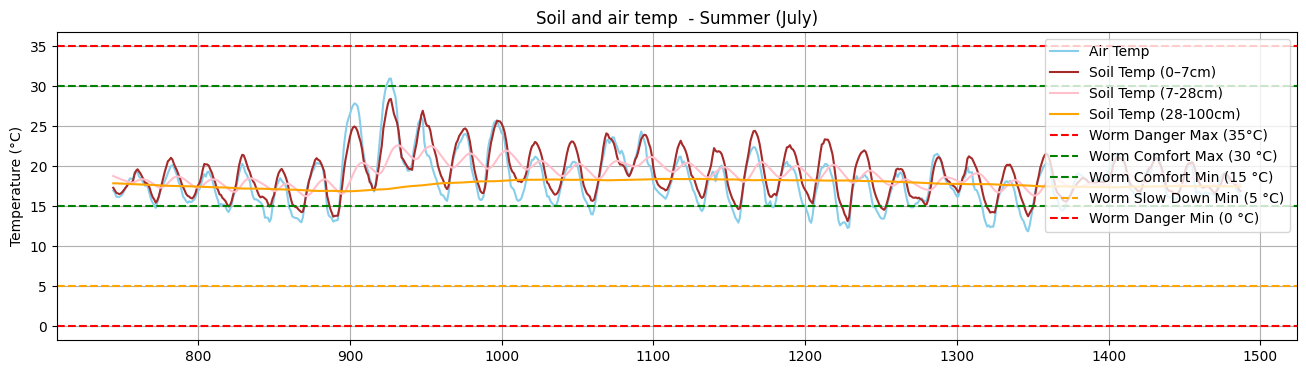

In [113]:
plt.figure(figsize=(16, 4))
plt.plot(july_2025.index, july_2025['temp'], label='Air Temp', color='skyblue')
plt.plot(july_2025.index, july_2025['soil_0_7'], label='Soil Temp (0–7cm)', color='brown')
plt.plot(july_2025.index, july_2025['soil_7_28'], label='Soil Temp (7-28cm)', color='pink')
plt.plot(july_2025.index, july_2025['soil_28_100'], label='Soil Temp (28-100cm)', color='orange')
plt.title("Soil and air temp  - Summer (July)")
plt.ylabel("Temperature (°C)")
add_worm_temperature_zones()
plt.legend(loc='upper right')
plt.grid()
plt.show()

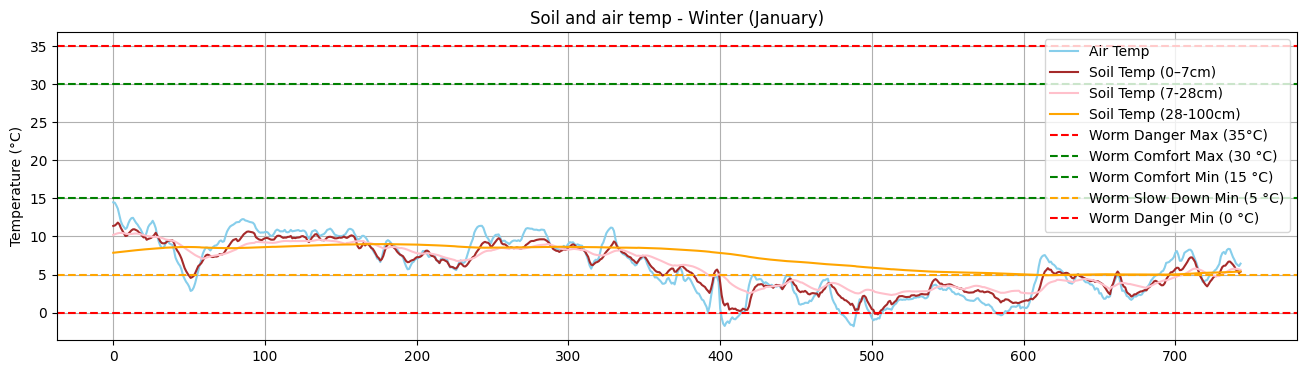

In [114]:
plt.figure(figsize=(16, 4))
plt.plot(jan_2025.index, jan_2025['temp'], label='Air Temp', color='skyblue')
plt.plot(jan_2025.index, jan_2025['soil_0_7'], label='Soil Temp (0–7cm)', color='brown')
plt.plot(jan_2025.index, jan_2025['soil_7_28'], label='Soil Temp (7-28cm)', color='pink')
plt.plot(jan_2025.index, jan_2025['soil_28_100'], label='Soil Temp (28-100cm)', color='orange')
plt.title("Soil and air temp - Winter (January)")
plt.ylabel("Temperature (°C)")
add_worm_temperature_zones()
plt.legend(loc='upper right')
plt.grid()
plt.show()